# LDA with dimentionality reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import random

### Make a toy dataset that actually comes from gaussian distribution

num_training_samples_class0 = 600
num_training_samples_class1 = 1000
num_training_samples_class2 = 800
num_training_samples = num_training_samples_class0 + num_training_samples_class1 + num_training_samples_class2
num_features = 2
num_classes = 3


means = (1, 1)
stds = np.array( (5,2.5,2.5,3) ).reshape(2,2)
print(stds)
data_set_class0_X = np.random.multivariate_normal(means, stds, num_training_samples_class0)
y_0 = np.zeros((num_training_samples_class0,1), dtype=np.int32)

print(data_set_class0_X.shape)


means = (10, 10)
stds = np.array( (5,4,4,5) ).reshape(2,2)
data_set_class1_X = np.random.multivariate_normal(means, stds, num_training_samples_class1)
y_1 = np.ones((num_training_samples_class1,1), dtype=np.int32)

means = (20, 20)
stds = np.array( (6,5,5,6) ).reshape(2,2)
data_set_class2_X = np.random.multivariate_normal(means, stds, num_training_samples_class2)
y_2 = np.ones((num_training_samples_class2,1), dtype=np.int32) + 1


X = np.vstack((data_set_class0_X, data_set_class1_X, data_set_class2_X))
y = np.vstack((y_0, y_1, y_2))


print(X.shape)
print(y.shape)

In [49]:
num_training_samples_class0 = 600
num_training_samples_class1 = 1000
num_training_samples_class2 = 800
num_training_samples = num_training_samples_class0 + num_training_samples_class1 + num_training_samples_class2
num_features = 2
num_classes = 3


means = (10, 1)
stds = np.array( (5,0,0,3) ).reshape(2,2)
print(stds)
data_set_class0_X = np.random.multivariate_normal(means, stds, num_training_samples_class0)
y_0 = np.zeros((num_training_samples_class0,1), dtype=np.int32)

print(data_set_class0_X.shape)


means = (0, 10)
stds = np.array( (5,0,0,5) ).reshape(2,2)
data_set_class1_X = np.random.multivariate_normal(means, stds, num_training_samples_class1)
y_1 = np.ones((num_training_samples_class1,1), dtype=np.int32)

means = (0, 20)
stds = np.array( (6,0,0,6) ).reshape(2,2)
data_set_class2_X = np.random.multivariate_normal(means, stds, num_training_samples_class2)
y_2 = np.ones((num_training_samples_class2,1), dtype=np.int32) + 1


X = np.vstack((data_set_class0_X, data_set_class1_X, data_set_class2_X))
y = np.vstack((y_0, y_1, y_2))


print(X.shape)
print(y.shape)

[[5 0]
 [0 3]]
(600, 2)
(2400, 2)
(2400, 1)


# Visualize the dataset

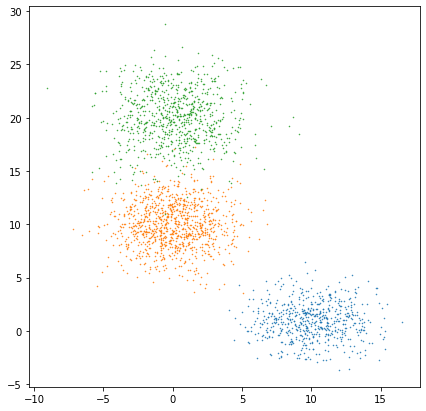

In [50]:
plt.figure(figsize=(7,7))
plt.plot(data_set_class0_X[:,0], data_set_class0_X[:,1], 'o', markersize=0.5)
plt.plot(data_set_class1_X[:,0], data_set_class1_X[:,1], 'o', markersize=0.5)
plt.plot(data_set_class2_X[:,0], data_set_class2_X[:,1], 'o', markersize=0.5)

plt.show()

# Calculate the prior distribution

In [51]:
# Calculate the prior
pi_0 = num_training_samples_class0 / num_training_samples
pi_1 = num_training_samples_class1 / num_training_samples
pi_2 = num_training_samples_class2 / num_training_samples

print(pi_0, pi_1, pi_2)

0.25 0.4166666666666667 0.3333333333333333


# Calculate the mean vectors

In [52]:
# Calculate means from dataset

mu_0 = np.array( [np.average(data_set_class0_X[:,0]), np.average(data_set_class0_X[:,1])] )
print(mu_0)

mu_1 = np.array( [np.average(data_set_class1_X[:,0]), np.average(data_set_class1_X[:,1])] )
print(mu_1)

mu_2 = np.array( [np.average(data_set_class2_X[:,0]), np.average(data_set_class2_X[:,1])] )
print(mu_1)


[10.01707615  0.93953472]
[0.01015956 9.9874008 ]
[0.01015956 9.9874008 ]


# Plot the means

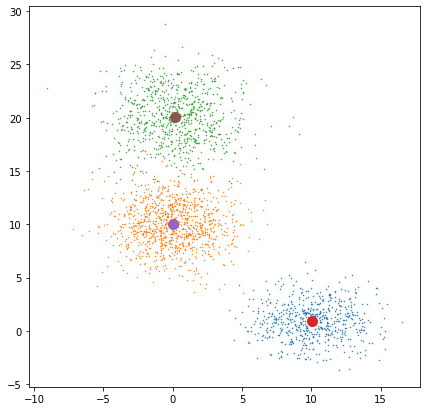

In [53]:
plt.figure(figsize=(7,7))
plt.plot(data_set_class0_X[:,0], data_set_class0_X[:,1], 'o', markersize=0.5)
plt.plot(data_set_class1_X[:,0], data_set_class1_X[:,1], 'o', markersize=0.5)
plt.plot(data_set_class2_X[:,0], data_set_class2_X[:,1], 'o', markersize=0.5)

plt.plot(mu_0[0], mu_0[1], 'o', markersize=10)
plt.plot(mu_1[0], mu_1[1], 'o', markersize=10)
plt.plot(mu_2[0], mu_2[1], 'o', markersize=10)


plt.show()

# Calculate the covariance matrix (same for both classes in LDA)

In [54]:
# Calculate the common covariance matrix

data_set_class0_X_centered = data_set_class0_X - mu_0
data_set_class1_X_centered = data_set_class1_X - mu_1
data_set_class2_X_centered = data_set_class2_X - mu_2


print(data_set_class0_X_centered.shape)

X_centered = np.vstack((data_set_class0_X_centered, data_set_class1_X_centered, data_set_class2_X_centered))
print(X_centered.shape)

common_sigma = np.matmul( X_centered.T , X_centered ) / num_training_samples
print(common_sigma)


(600, 2)
(2400, 2)
[[ 5.39937052 -0.01098907]
 [-0.01098907  4.80471899]]


In [55]:
def lda_decision_function(x, mu_0_vec, mu_1_vec, mu_2_vec, prior_0, prior_1, prior_2, common_cov_matrix):
    
    cov_inv = np.linalg.inv(common_cov_matrix)
    
    d_0 = x.T @ cov_inv @ mu_0_vec - (0.5 * mu_0_vec.T @ cov_inv @ mu_0_vec) + np.log(prior_0)
    d_1 = x.T @ cov_inv @ mu_1_vec - (0.5 * mu_1_vec.T @ cov_inv @ mu_1_vec) + np.log(prior_1)
    d_2 = x.T @ cov_inv @ mu_2_vec - (0.5 * mu_2_vec.T @ cov_inv @ mu_2_vec) + np.log(prior_2)
    
    return np.array( (d_0, d_1, d_2) )

In [56]:
x = np.array([1,1])

decision = lda_decision_function(x, mu_0, mu_1, mu_2, pi_0, pi_1, pi_2, common_sigma)
print(decision)
print(np.argmax(decision))


[ -8.71875162  -9.17100828 -38.85972471]
0


# LDA Class

In [57]:
class LDA:
    
    def __init__(self, mu_0_vec, mu_1_vec, mu_2_vec, prior_0, prior_1, prior_2, common_cov_matrix):
        self.mu_0_vec = mu_0_vec
        self.mu_1_vec = mu_1_vec
        self.mu_2_vec = mu_2_vec
        self.prior_0 = prior_0
        self.prior_1 = prior_1
        self.prior_2 = prior_2
        self.common_cov_matrix = common_cov_matrix
        self.cov_inv = np.linalg.inv(common_cov_matrix)
        
    def predict(self, X):
        
        num_obs = X.shape[0]
        y_preds = []
        
        for row in range(num_obs):
            
            x = X[row, :]

            d_0 = x.T @ self.cov_inv @ self.mu_0_vec - (0.5 * self.mu_0_vec.T @ self.cov_inv @ self.mu_0_vec) + np.log(self.prior_0)
            d_1 = x.T @ self.cov_inv @ self.mu_1_vec - (0.5 * self.mu_1_vec.T @ self.cov_inv @ self.mu_1_vec) + np.log(self.prior_1)
            d_2 = x.T @ self.cov_inv @ self.mu_2_vec - (0.5 * self.mu_2_vec.T @ self.cov_inv @ self.mu_2_vec) + np.log(self.prior_2)
            
            y_preds.append( np.argmax( (d_0, d_1, d_2) ) )
            
        return np.array(y_preds)


# Visualize the decision boundary

<AxesSubplot:>

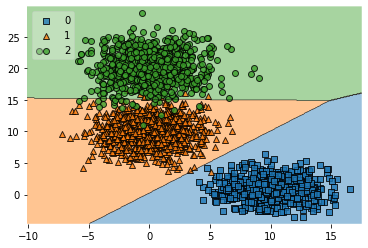

In [58]:
clf = LDA(mu_0, mu_1, mu_2, pi_0, pi_1, pi_2, common_sigma)

plot_decision_regions(X, np.squeeze(y), clf=clf, legend=2)

In [59]:
mu = np.vstack( (mu_0, mu_1, mu_2) )
B = mu.T @ mu
W = common_sigma

print(B.shape, W.shape)

(2, 2) (2, 2)


In [60]:
temp_mat = np.linalg.inv(W) @ B

eig_vals, eig_vecs = np.linalg.eig(temp_mat)

print(eig_vals)
print(eig_vecs)

[ 18.51140278 104.98990571]
[[-0.99949091 -0.03042484]
 [ 0.03190501 -0.99953706]]


In [62]:
# Pick the eigen vector with highest eigen value
projection_vector = eig_vecs[:,1].T
print(projection_vector)

[-0.03042484 -0.99953706]


In [63]:
X_low_dim = X @ projection_vector

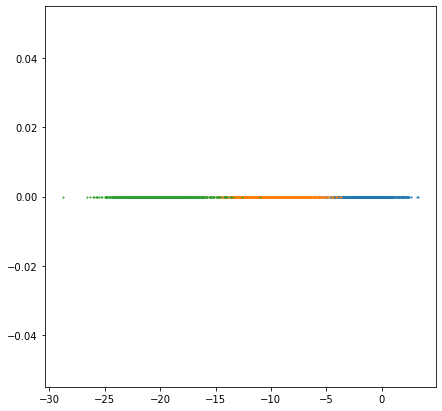

In [67]:
plt.figure(figsize=(7,7))
plt.plot(data_set_class0_X @ projection_vector, np.zeros(num_training_samples_class0) , 'o', markersize=1)
plt.plot(data_set_class1_X @ projection_vector, np.zeros(num_training_samples_class1) , 'o', markersize=1)
plt.plot(data_set_class2_X @ projection_vector, np.zeros(num_training_samples_class2) , 'o', markersize=1)

plt.show()